## KNN Challenge

Comparing models is something data scientists do all the time. There's very rarely just one model that would be possible to run for a given situation, so learning to choose the best one is very important.

Here let's work on regression. Find a data set and build a KNN Regression and an OLS regression. Compare the two. How similar are they? Do they miss in different ways?

Create a Jupyter notebook with your models. At the end in a markdown cell write a few paragraphs to describe the models' behaviors and why you favor one model or the other. Try to determine whether there is a situation where you would change your mind, or whether one is unambiguously better than the other. Lastly, try to note what it is about the data that causes the better model to outperform the weaker model. Submit a link to your notebook below.

In [1]:
# handle table-like data, matrices, and stats
import pandas as pd
import numpy as np
#import scipy
from scipy import stats
import math


#import mglearn 


# regression 
#import sklearn
#from sklearn import linear_model
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from statsmodels.formula.api import ols
from sklearn.neighbors import KNeighborsRegressor


#from sklearn.model_selection import KFold

# sklearn KNN package
#from sklearn.neighbors import KNeighborsClassifier  
from sklearn import neighbors


# preprocessing
# from sklearn import svm, preprocessing 
from sklearn.preprocessing import MinMaxScaler , StandardScaler, Imputer, LabelEncoder


# modelling helpers
from sklearn.model_selection import train_test_split, KFold, cross_val_score

# evaluation metrics
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,mean_absolute_error 
from statsmodels.tools.eval_measures import mse, rmse

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


# Configure visualisations
#%matplotlib inline
#mpl.style.use( 'ggplot' )
#plt.style.use('fivethirtyeight')
#sns.set(context="notebook", palette="dark", style = 'whitegrid' , color_codes=True)
#params = { 
#    'axes.labelsize': "large",
#    'xtick.labelsize': 'x-large',
#    'legend.fontsize': 20,
#    'figure.dpi': 150,
#    'figure.figsize': [25, 7]
#}
#plt.rcParams.update(params)

# Center all plots
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""");

# Ignore warnings :
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_diamonds = pd.read_csv('diamonds.csv')

In [3]:
pd.set_option('display.max_columns', 999)

In [4]:
df_diamonds.sample(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
38868,38869,0.40,Premium,F,VS1,62.6,58.0,1050,4.72,4.68,2.94
33459,33460,0.32,Premium,G,VS1,62.8,58.0,828,4.39,4.34,2.74
36363,36364,0.33,Ideal,F,VVS1,61.3,55.0,939,4.45,4.46,2.73
31664,31665,0.33,Ideal,E,VS1,61.7,54.0,768,4.45,4.47,2.75
43893,43894,0.30,Ideal,D,SI1,62.4,54.0,508,4.32,4.34,2.70


In [5]:
df_diamonds.shape

(53940, 11)

In [6]:
df_diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
Unnamed: 0    53940 non-null int64
carat         53940 non-null float64
cut           53940 non-null object
color         53940 non-null object
clarity       53940 non-null object
depth         53940 non-null float64
table         53940 non-null float64
price         53940 non-null int64
x             53940 non-null float64
y             53940 non-null float64
z             53940 non-null float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [7]:
df_diamonds.get_dtype_counts() 

float64    6
int64      2
object     3
dtype: int64

In [8]:
df_diamonds.isnull().any()

Unnamed: 0    False
carat         False
cut           False
color         False
clarity       False
depth         False
table         False
price         False
x             False
y             False
z             False
dtype: bool

In [9]:
# look at general stats... look at all stats for all dtypes
df_diamonds.describe(include = 'all')

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940,53940,53940,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
unique,NaN,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,21551,11292,13065,NaN,NaN,NaN,NaN,NaN,NaN
mean,26970.500000,0.797940,NaN,NaN,NaN,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,NaN,NaN,NaN,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,NaN,NaN,NaN,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,NaN,NaN,NaN,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,NaN,NaN,NaN,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,NaN,NaN,NaN,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000


X/Y/Z columns are references to length, width, and height of the diamonds. Therefore, it's weird that the minimum value for these columns are "0". It's impossible to have a zero in reference of 3 dimensions. 

In [10]:
df_diamonds.loc[(df_diamonds['x']==0) | (df_diamonds['y']==0) | (df_diamonds['z']==0)]

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
2207,2208,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,2315,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,4792,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,5472,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,10168,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,11183,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,11964,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,13602,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,15952,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,24395,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


In [11]:
# removing all rows where a "0" exists in x/y/z columns
df_diamonds_2 = df_diamonds[(df_diamonds[['x','y','z']] != 0).all(axis=1)].copy()
df_diamonds_2 = df_diamonds_2.drop('Unnamed: 0', axis = 1)

In [12]:
# determine which columns are likely categorical vs continuous variables
# look at the lower numbers to recognize potential categorical variables
df_diamonds_2.nunique().sort_values()

cut            5
color          7
clarity        8
table        127
depth        184
carat        273
z            374
y            550
x            553
price      11597
dtype: int64

[]

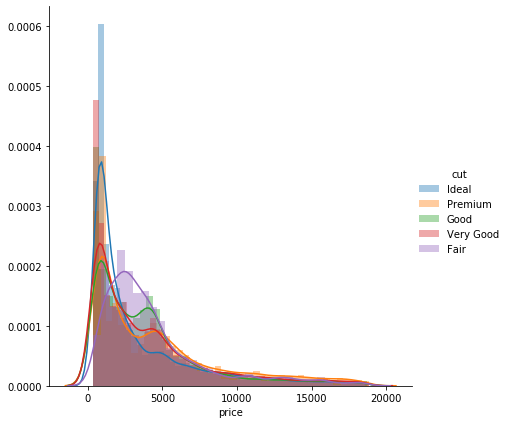

In [13]:
# What's the distribution of cut quality?
sns.FacetGrid(df_diamonds_2, hue = 'cut', height = 6).map(sns.distplot, 'price').add_legend()
plt.plot()

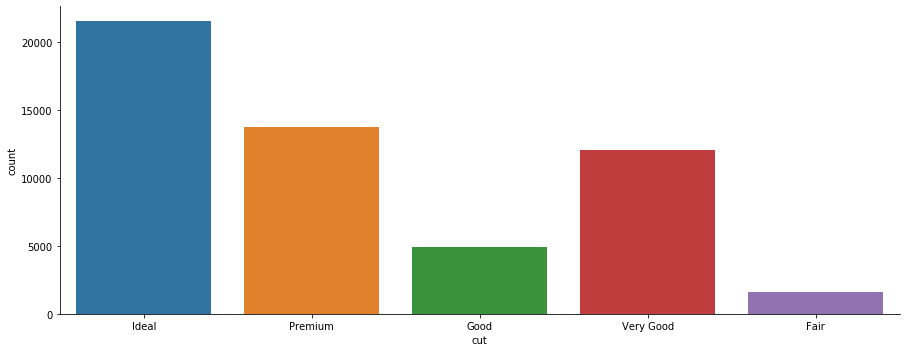

In [14]:
# sum of type of cut quality
sns.catplot(x='cut', data=df_diamonds_2 , kind='count',aspect=2.5 )

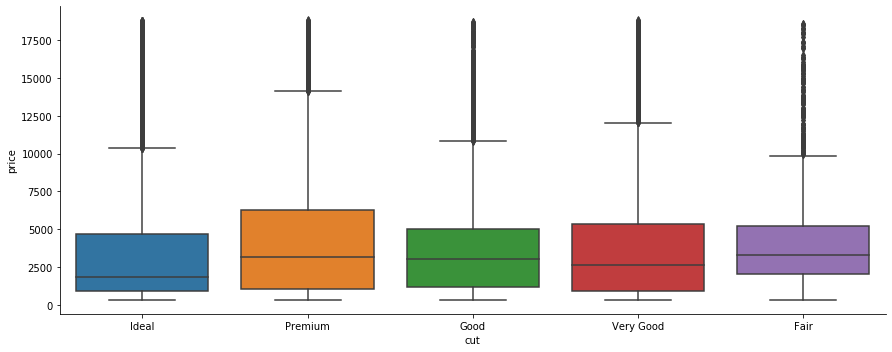

In [15]:
# cat plot for cut vs price.

# seems outliers exist above $10000.
sns.catplot(x='cut', y='price', data=df_diamonds_2, kind='box' ,aspect=2.5 )

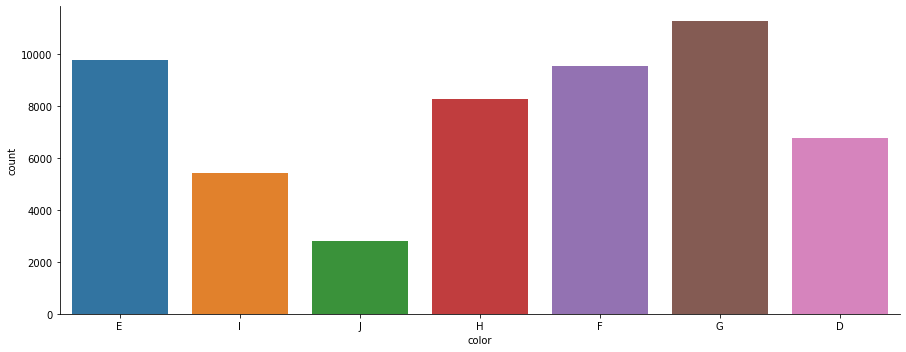

In [16]:
# color count 
sns.catplot(x='color', data=df_diamonds_2 , kind='count',aspect=2.5 )

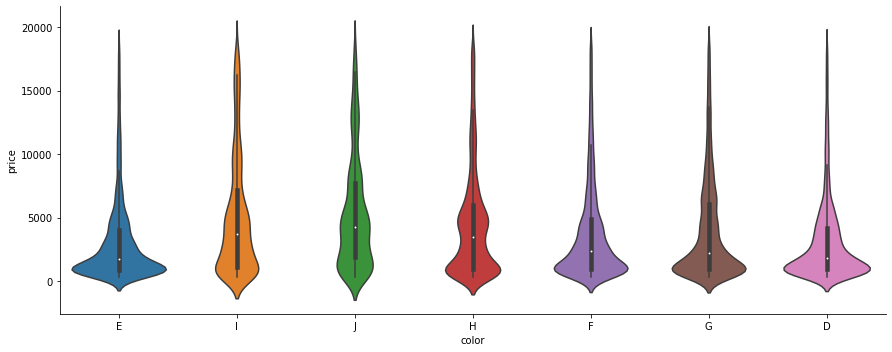

In [17]:
# cat violin plot of color vs price
# trend appears similar to cut quality
sns.catplot(x='color', y='price' , data=df_diamonds_2 , kind='violin', aspect=2.5)

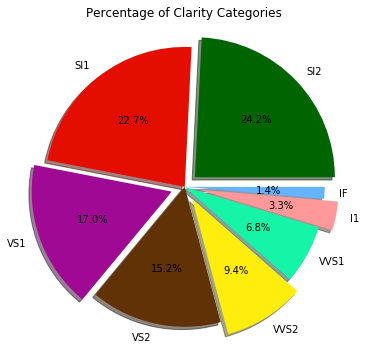

In [18]:
# pie chart of clarity
labels = df_diamonds_2.clarity.unique().tolist()
sizes = df_diamonds_2.clarity.value_counts().tolist()
colors = ['#006400', '#E40E00', '#A00994', '#613205', '#FFED0D', '#16F5A7','#ff9999','#66b3ff']
explode = (0.1, 0.0, 0.1, 0, 0.1, 0, 0.1,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=0)
plt.axis('equal')
plt.title("Percentage of Clarity Categories")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

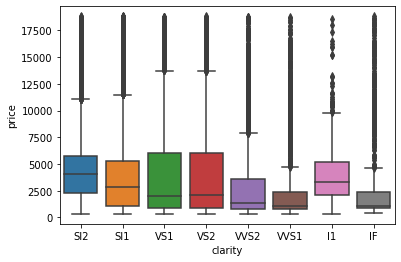

In [19]:
# box plot of clairty vs price.

# similar trend to cut quality and color
sns.boxplot(x='clarity', y='price', data=df_diamonds_2 )

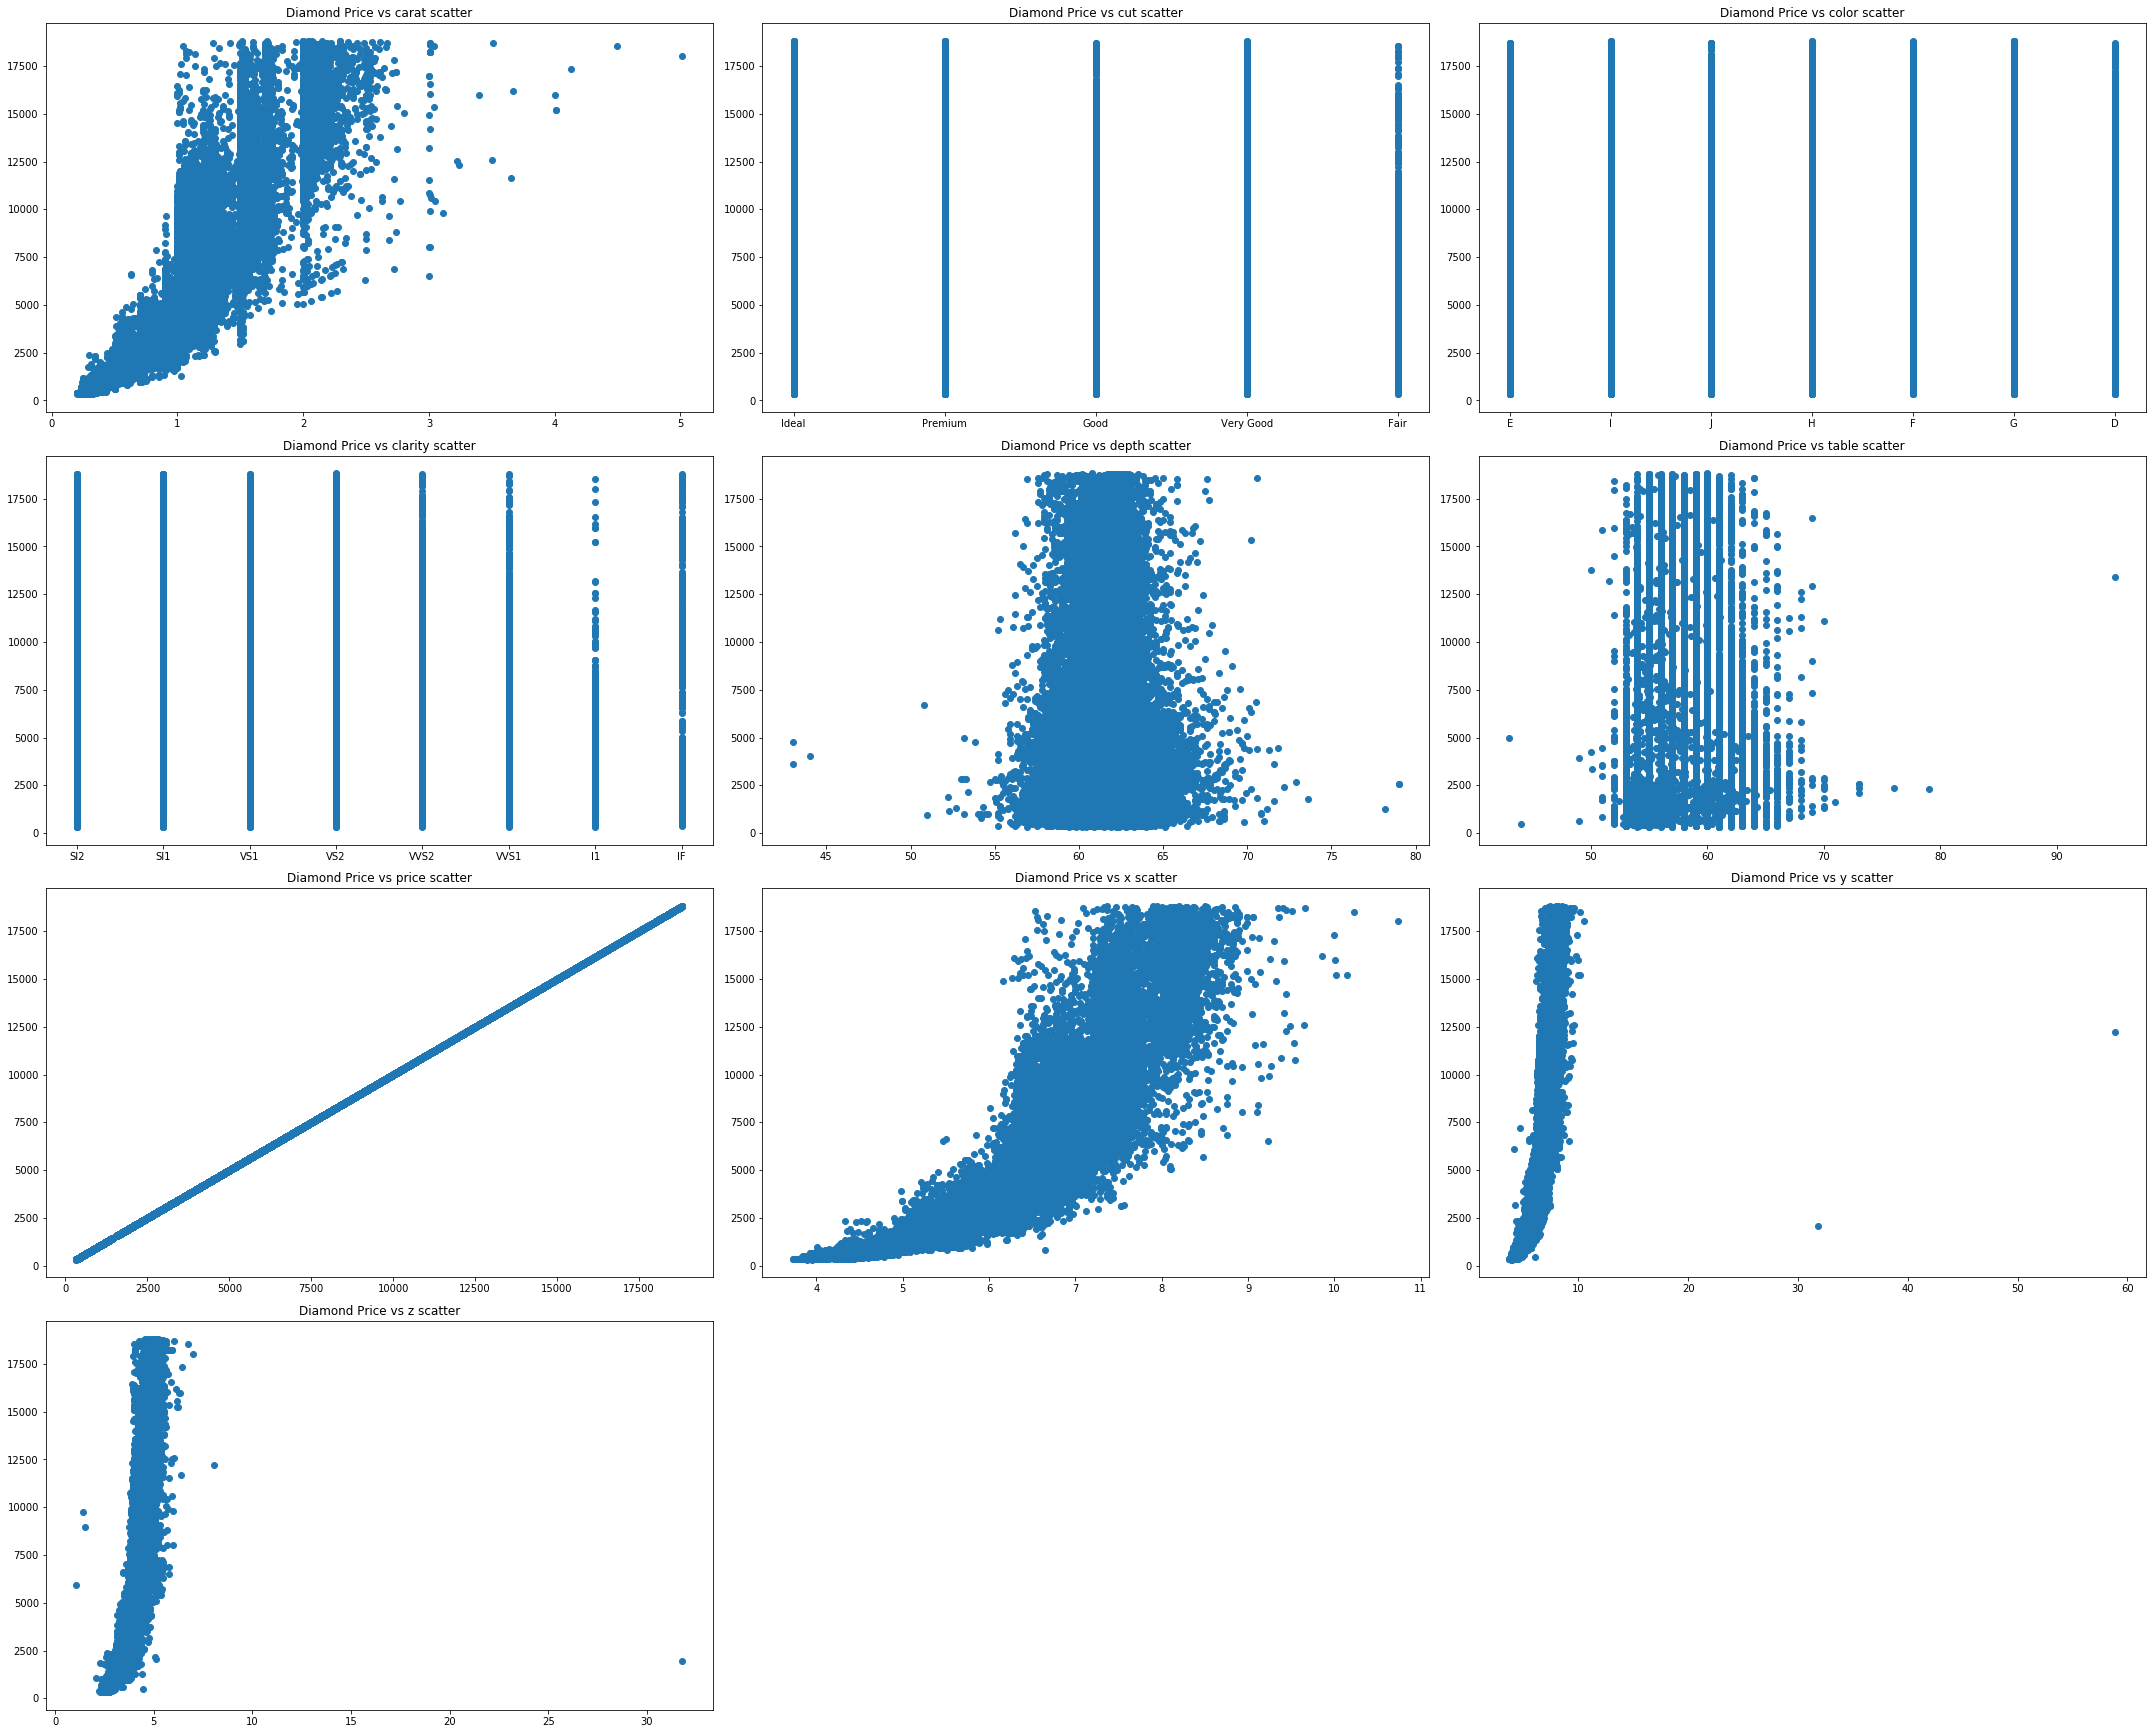

In [20]:
num_cols = df_diamonds_2.columns.copy()

def draw_scatter(df, columns, n_rows, n_cols):
    fig=plt.figure(figsize = (30,60))
    for i, var_name in enumerate(columns):
        ax=fig.add_subplot(n_rows, n_cols, i+1)
        ax.scatter(df[var_name], df['price'])
        ax.set_title('Diamond Price vs ' + str(var_name) + " scatter")
    fig.tight_layout()
    plt.show()
    
draw_scatter(df_diamonds_2, num_cols, len(num_cols), 3)

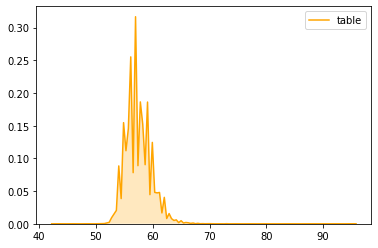

In [21]:
sns.kdeplot(df_diamonds_2['table'] ,shade=True , color='orange')

(2, 10)

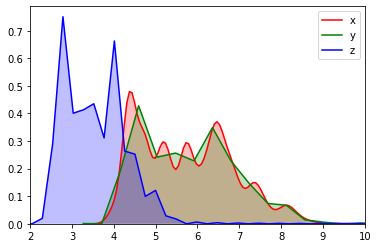

In [22]:
sns.kdeplot(df_diamonds_2['x'] ,shade=True , color='r' )
sns.kdeplot(df_diamonds_2['y'] , shade=True , color='g' )
sns.kdeplot(df_diamonds_2['z'] , shade= True , color='b')
plt.xlim(2,10)

In [23]:
# create new 'volume' column by multiplying values in the dimension columns
df_diamonds_2['volume'] = df_diamonds_2['x']*df_diamonds_2['y']*df_diamonds_2['z']
df_diamonds_2.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250


(0, 50000)

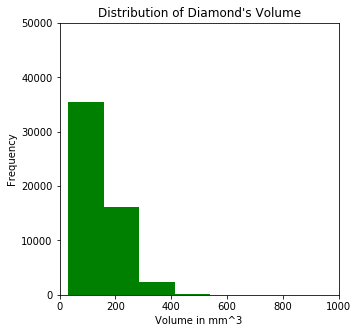

In [24]:
plt.figure(figsize=(5,5))
plt.hist( x=df_diamonds_2['volume'] , bins=30 ,color='g')
plt.xlabel('Volume in mm^3')
plt.ylabel('Frequency')
plt.title('Distribution of Diamond\'s Volume')
plt.xlim(0,1000)
plt.ylim(0,50000)

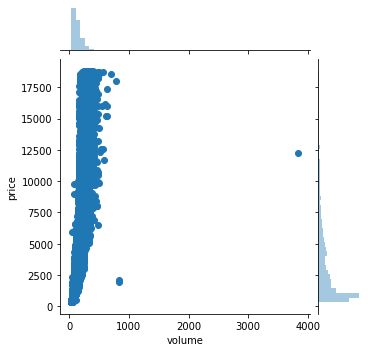

In [25]:
# volume has a fairly linear relationship with price
sns.jointplot(x='volume', y='price' , data=df_diamonds_2, height=5)

In [26]:
df_diamonds_2['cut'].value_counts()

Ideal        21548
Premium      13780
Very Good    12081
Good          4902
Fair          1609
Name: cut, dtype: int64

In [27]:
# categorical data to numeric data

# feature encoding
cut_dict = {'Fair' : 1, 'Good' : 2, 'Very Good' : 3, 'Premium' : 4, 'Ideal' : 5}
clarity_dict ={ 'I1' : 1, 'SI2' : 2, 'SI1' : 3, 'VS2' : 4, 'VS1' : 5, 'VVS2' : 6, 'VVS1' : 7 , 'IF' : 8}
color_dict = {'D':7, 'E':6, 'F':5, 'G':4, 'H':3, 'I':2, 'J':1}

In [28]:
# replace descriptive, ranked words with numeric values
df_diamonds_2['cut'] = df_diamonds_2['cut'].map(cut_dict)
df_diamonds_2['clarity'] = df_diamonds_2['clarity'].map(clarity_dict)
df_diamonds_2['color'] = df_diamonds_2['color'].map(color_dict)

In [29]:
num_cols_2 = df_diamonds_2.columns.copy()

In [30]:
df_diamonds_2.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,0.23,5,6,2,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,4,6,3,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,0.23,2,6,5,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,0.29,4,2,4,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,0.31,2,1,2,63.3,58.0,335,4.34,4.35,2.75,51.917250


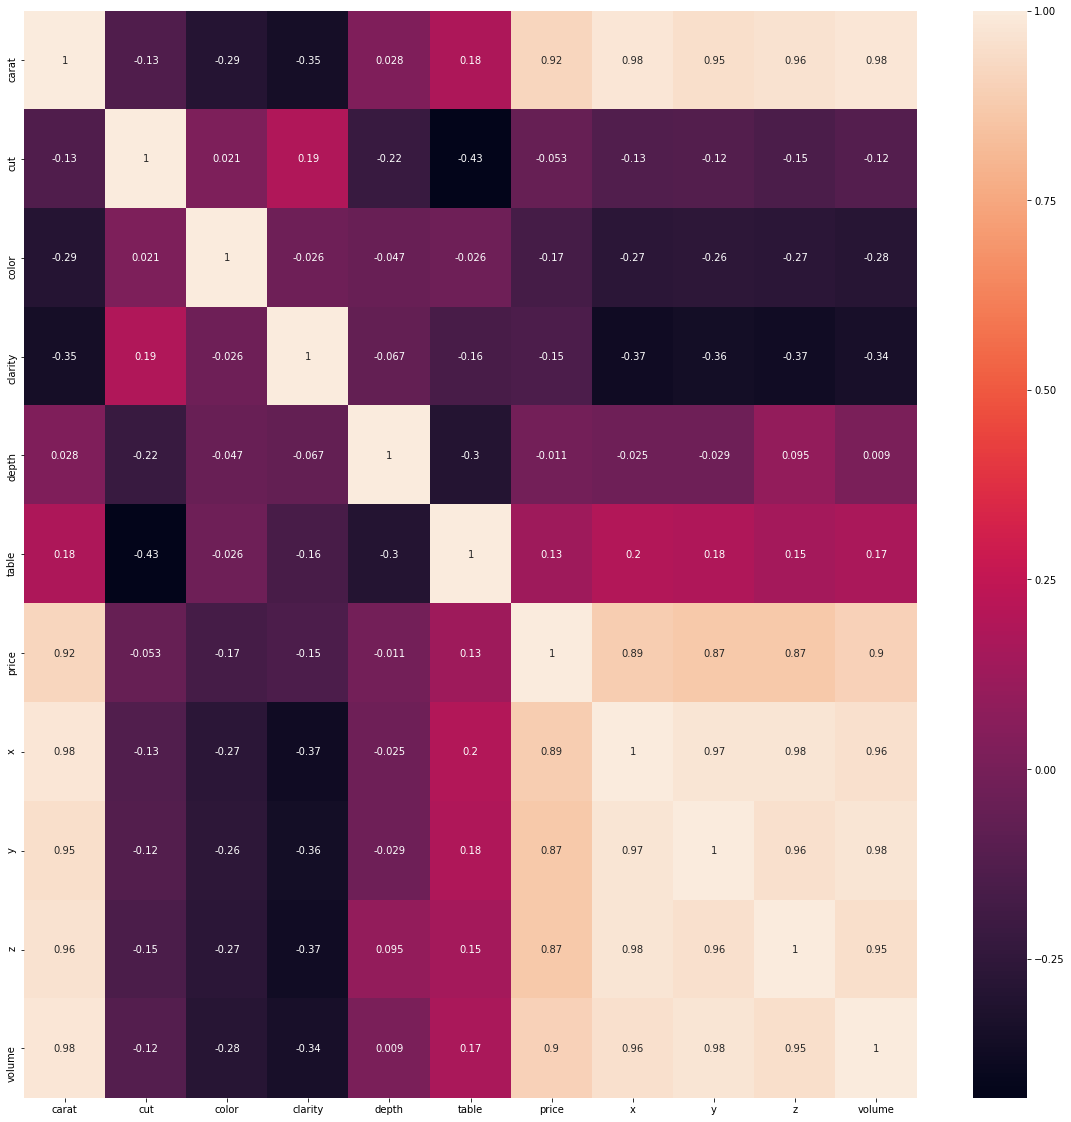

In [31]:
# See the correlation heatmap of the features
plt.figure(figsize=(20,20))
sns.heatmap(df_diamonds_2[num_cols_2].corr(),annot=True)

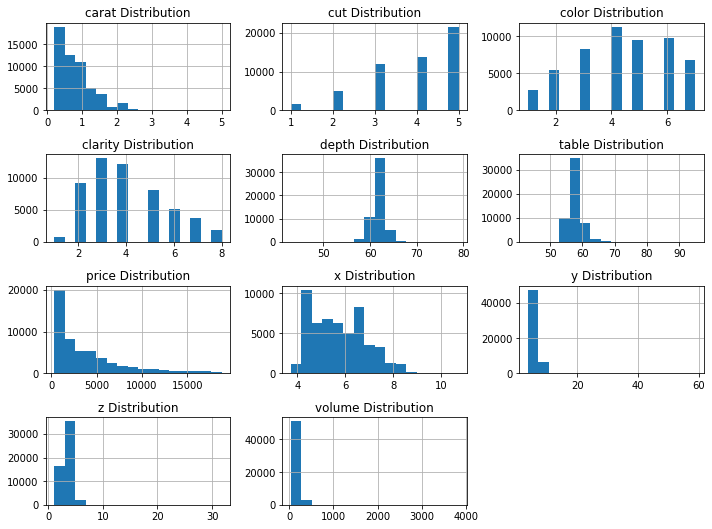

In [32]:
# Univariate visualization without having to manually plot each graph

def draw_histograms(df, columns, n_rows, n_cols):
    fig=plt.figure(figsize =(10, 20))
    for i, var_name in enumerate(columns):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=16,ax=ax)
        ax.set_title(var_name + " Distribution")
        
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()
    
draw_histograms(df_diamonds_2, num_cols_2, len(num_cols_2), 3)

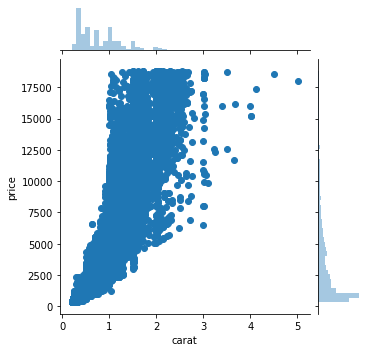

In [33]:
sns.jointplot(x='carat' , y='price' , data=df_diamonds_2 , height=5)

In [46]:
df_diamonds_3 = df_diamonds_2.drop(['x', 'y', 'z'], axis = 1)
df_diamonds_3.head()

,carat,cut,color,clarity,depth,table,price,volume
0,0.23,5,6,2,61.5,55.0,326,38.202030
1,0.21,4,6,3,59.8,61.0,326,34.505856
2,0.23,2,6,5,56.9,65.0,327,38.076885
3,0.29,4,2,4,62.4,58.0,334,46.724580
4,0.31,2,1,2,63.3,58.0,335,51.917250


In [47]:
# defining features
X = df_diamonds_3.drop(['price'], axis = 1)
y = df_diamonds_3['price']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=66)

In [48]:
# scaling features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


R-squared of the model in the training set is: 0.904137828613362
-----Test set statistics-----
R-squared of the model in the test set is: 0.9053797359099787
Mean absolute error of the prediction is: 856.3353213329474
Mean squared error of the prediction is: 1525343.059341741
Root mean squared error of the prediction is: 1235.0477963794524
Mean absolute percentage error of the prediction is: 50.366528518664936
Accuracies of the model are: [0.89570448 0.90544528 0.90272054 0.90162343 0.90874481]


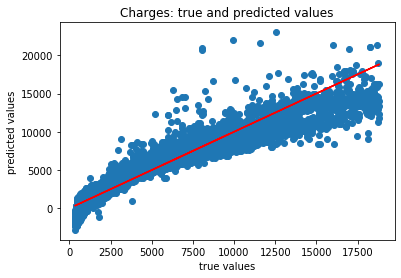

In [49]:
# We fit an OLS model using sklearn
lrm = LinearRegression()
lrm.fit(X_train, y_train)

# get accuracies
accuracies = cross_val_score(estimator = lrm, X = X_train, y = y_train, cv = 5,verbose = 1)

# We are making predictions here
y_preds_train = lrm.predict(X_train)
y_pred = lrm.predict(X_test)

alphas = [np.power(10.0,p) for p in np.arange(-10,40,1)]

# Comparing predictions from training set(y_preds_train) and test set (y_pred)
print("R-squared of the model in the training set is: {}".format(lrm.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in the test set is: {}".format(lrm.score(X_test, y_test))) 
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_pred))) # performance metrics
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_pred)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_pred)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_pred) / y_test)) * 100))

print('Accuracies of the model are: ' + str(accuracies))

plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.6s finished


R-squared of the model in the training set is: 0.999927721840996
-----Test set statistics-----
R-squared of the model in the test set is: 0.9703152238192316
Mean absolute error of the prediction is: 364.06574460318467
Mean squared error of the prediction is: 478538.7966405312
Root mean squared error of the prediction is: 691.7649865673538
Mean absolute percentage error of the prediction is: 12.451869810815104
Accuracies of the model are: [0.9684526  0.97007094 0.96679041 0.96561025 0.96879021]


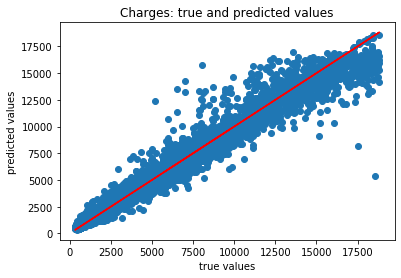

In [50]:
score = []
for k in range(1,20):   # running for different K values to know which yields the max accuracy. 
    knn = KNeighborsRegressor(n_neighbors = k,  weights = 'distance')
    knn.fit(X_train, y_train)
    score.append(knn.score(X_test, y_test )) 

    
# We are making predictions here
y_preds_train = knn.predict(X_train)
y_pred = knn.predict(X_test)
    
# get accuracies
accuracies = cross_val_score(estimator = knn, X = X_train, y = y_train, cv = 5,verbose = 1)

# Comparing predictions from training set(y_preds_train) and test set (y_pred)
print("R-squared of the model in the training set is: {}".format(knn.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in the test set is: {}".format(knn.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_pred))) # performance metrics
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_pred)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_pred)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_pred) / y_test)) * 100))

print('Accuracies of the model are: ' + str(accuracies))

plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

### Tuning Parameters

In [51]:
# find most accurate k value
k_max = score.index(max(score))+1
print( "At K = {}, Max Accuracy = {}".format(k_max, max(score)*100))

At K = 11, Max Accuracy = 97.12956130275582


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.1s finished


R-squared of the model in the training set is: 0.999927721840996
-----Test set statistics-----
R-squared of the model in the test set is: 0.9712956130275582
Mean absolute error of the prediction is: 359.9174286082888
Mean squared error of the prediction is: 462734.2553115021
Root mean squared error of the prediction is: 680.2457315643385
Mean absolute percentage error of the prediction is: 12.186825452755002
Accuracies of the model are: [0.96898046 0.9702359  0.96811711 0.96613361 0.96856313]


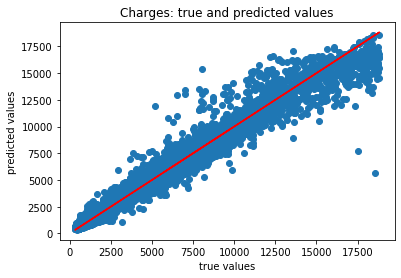

In [52]:
# applying KNN model with optimized k value
knn = KNeighborsRegressor(n_neighbors = k_max,  weights = 'distance')
knn.fit(X_train, y_train)

# We are making predictions here
y_preds_train = knn.predict(X_train)
y_pred = knn.predict(X_test)
    
# get accuracies
accuracies = cross_val_score(estimator = knn, X = X_train, y = y_train, cv = 5,verbose = 1)

# Comparing predictions from training set(y_preds_train) and test set (y_pred)
print("R-squared of the model in the training set is: {}".format(knn.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in the test set is: {}".format(knn.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_pred))) # performance metrics
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_pred)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_pred)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_pred) / y_test)) * 100))

print('Accuracies of the model are: ' + str(accuracies))

plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

In [53]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, X, y, cv=5)
print("Weighted KNN Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(lrm, X, y, cv=5)
print("OLS Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Weighted KNN Accuracy: 0.13 (+/- 0.77)
OLS Accuracy: -3.27 (+/- 13.75)


### Conclusions

- The linear and KNN regression models both display R-sqaures above 0.9. 
- KNN appears to perform with higher accuracy of 0.97, vs the OLS model with a 0.905.
- The KNN model predicts in a fairly linear fashion, with relative outliers to the positive and negative of the trend line.
- The linear model seems to predict values that flatten out compared to the KNN model and less linear relationship. The relative outliers seem to also be above the generat trend of the data.

## Linear Regression: 
### Loss function :
- In LR, we use mean squared error as the metric of loss. The deviation of expected and actual outputs will be squared and sum up. Derivative of this loss will be used by gradient descend algorithm.
### Advantages :
- Easy and simple implementation.
- Space complex solution.
- Fast training.
- Value of θ coefficients gives an assumption of feature significance.
### Disadvantages :
- Applicable only if the solution is linear. In many real life scenarios, it may not be the case.
- Algorithm assumes the input residuals (error) to be normal distributed, but may not be satisfied always.
- Algorithm assumes input features to be mutually independent(no co-linearity).

## KNN Regression
### Loss function :
- There is no training involved in KNN. During testing, k neighbors with minimum distance, will take part in classification /regression.
### Advantages :
- Easy and simple machine learning model.
- Few hyperparameters to tune.
### Disadvantages :
- k should be wisely selected.
- Large computation cost during runtime if sample size is large.
- Proper scaling should be provided for fair treatment among features.
### Hyperparameters :
- KNN mainly involves two hyperparameters, K value & distance function.
- K value : how many neighbors to participate in the KNN algorithm. k should be tuned based on the validation error.
- distance function : Euclidean distance is the most used similarity function. Manhattan distance, Hamming Distance, Minkowski distance are different alternatives.

## Linear Regression vs KNN :
- KNN is a non -parametric model, whereas LR is a parametric model.
- KNN is slow in real time as it have to keep track of all training data and find the neighbor nodes, whereas LR can easily extract output from the tuned θ coefficients.
- KNN is better than linear regression when the data have high SNR.

In the case of this data set, I would use the KNN Regression model instead of the Linear Regression model due to the relatively higher accuracy and better performance metrics. 
If we simply needed a quick answer in a large data set and the features had linear relationships with the target, then I think Linear Regression would be the preferred model. LRM could provide a reasonable answer in short time frame. 
In addition, LRM allows the data scientist to understand the statistical relationshipos of each feature in a single report. That information alone can be useful to summarize before using any model.